### Importing Libraries

In [10]:
import cv2
import numpy as np
from PIL import Image

### Importing Image

In [67]:
cars=cv2.imread("cars.png",0)

In [12]:
cars.shape

(250, 450)

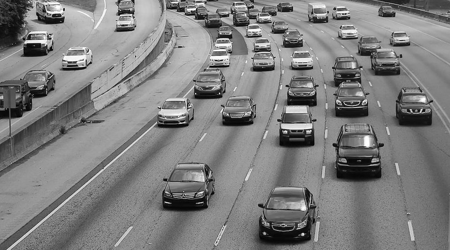

In [13]:
Image.fromarray(cars)

### Image preprocessing

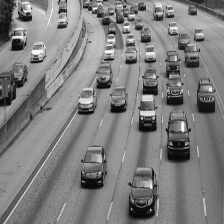

In [70]:
cars1=cv2.resize(cars,(224,224))
Image.fromarray(cars1)

#### Removing Noise

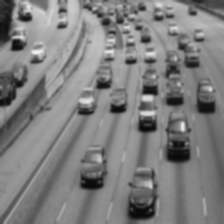

In [18]:
cars_blur=cv2.GaussianBlur(cars1,(5,5),0)
Image.fromarray(cars_blur)

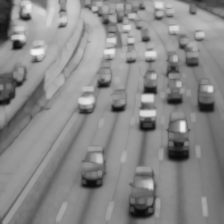

In [19]:
cars_dilation=cv2.dilate(cars_blur,np.ones((3,3)))
Image.fromarray(cars_dilation)

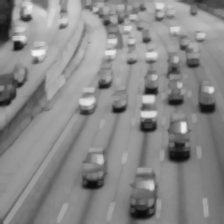

In [44]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
cars_closing = cv2.morphologyEx(cars_dilation, cv2.MORPH_CLOSE, kernel) 
Image.fromarray(cars_closing)

### Cascade

In [23]:
cars_cascade="cars.xml"

In [24]:
cascade=cv2.CascadeClassifier(cars_cascade)

#### without blurring

In [58]:
cars_detected=cascade.detectMultiScale(cars1,1.1,1)

In [59]:
cars_detected

array([[181,   0,  21,  21],
       [ 49,  14,  21,  21],
       [  4,  25,  28,  28],
       [156, 128,  45,  45],
       [ 90,  68,  26,  26],
       [137,  71,  26,  26],
       [ 24,  46,  24,  24],
       [ 66, 154,  47,  47],
       [178,  46,  28,  28],
       [ 74,  99,  21,  21],
       [ 59,  85,  43,  43],
       [114,  96,  52,  52]])

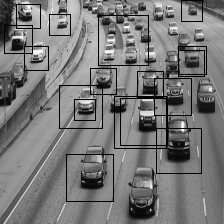

In [60]:
number_of_cars=0
for x,y,b,h in cars_detected:
    cv2.rectangle(cars1,(x,y),(x+b,y+h),(0,0,255),1)
    number_of_cars+=1
Image.fromarray(cars1)
    

#### After blurring

In [62]:
cars_detected=cascade.detectMultiScale(cars_blur,1.1,1)
cars_detected

array([[134,  26,  22,  22],
       [182,   0,  22,  22],
       [162,  20,  23,  23],
       [ 13,   1,  25,  25],
       [  4,  32,  24,  24],
       [174,  43,  35,  35],
       [ 71,  95,  28,  28],
       [127, 100,  41,  41]])

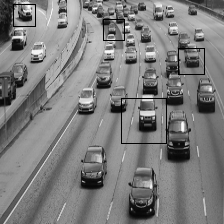

In [71]:
number_of_cars=0
for x,y,b,h in cars_detected:
    cv2.rectangle(cars1,(x,y),(x+b,y+h),(0,0,255),1)
    number_of_cars+=1
Image.fromarray(cars1)

#### After dilation

In [64]:
cars_detected=cascade.detectMultiScale(cars_dilation,1.1,1)
cars_detected

array([[ 13,   4,  22,  22],
       [103,  19,  21,  21],
       [178,  48,  26,  26],
       [121,  98,  45,  45]])

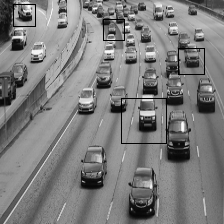

In [69]:
number_of_cars=0
for x,y,b,h in cars_detected:
    cv2.rectangle(cars1,(x,y),(x+b,y+h),(0,0,255),1)
    number_of_cars+=1
Image.fromarray(cars1)

In [57]:
# Car detection in Video

In [54]:
cascade_src = 'cars.xml'
video_src = 'Cars.mp4'

cap = cv2.VideoCapture(video_src)
car_cascade = cv2.CascadeClassifier(cascade_src)


In [55]:
while True:
    result, img = cap.read()
   
    if result is False:
        break
        
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cars = car_cascade.detectMultiScale(gray, 1.1, 2)

    for (x,y,w,h) in cars:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
    cv2.imshow("vid",img)
    if cv2.waitKey(1) & 0xFF==ord("q"):
        break



In [56]:
cap.release()
cv2.destroyAllWindows()